


1/1 [==============================] - 0s 129ms/step


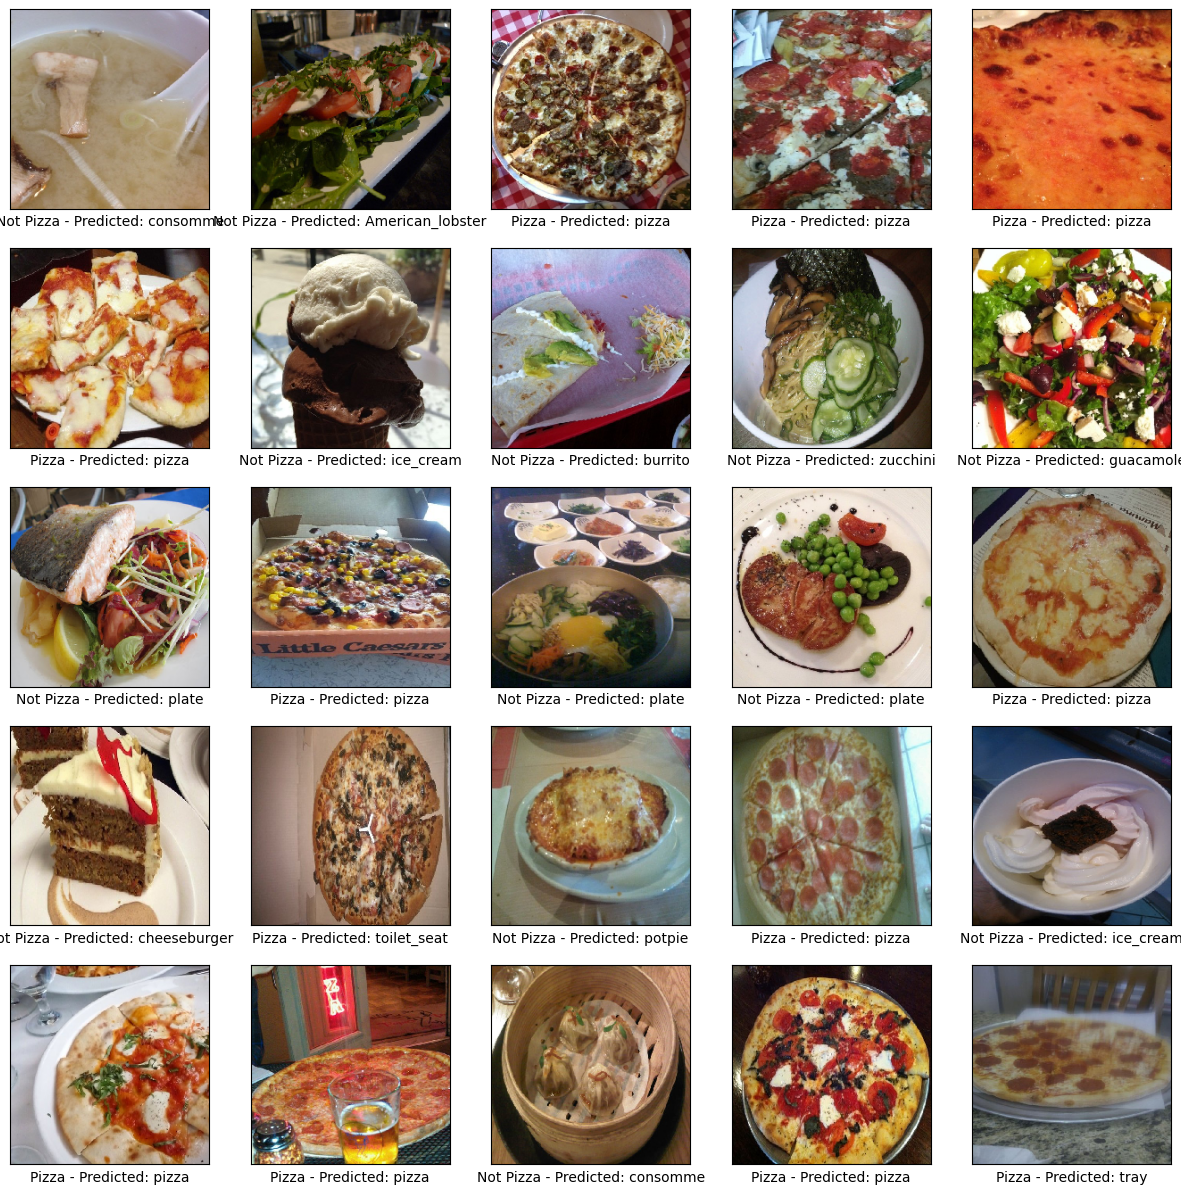

1/1 [==============================] - 0s 179ms/step


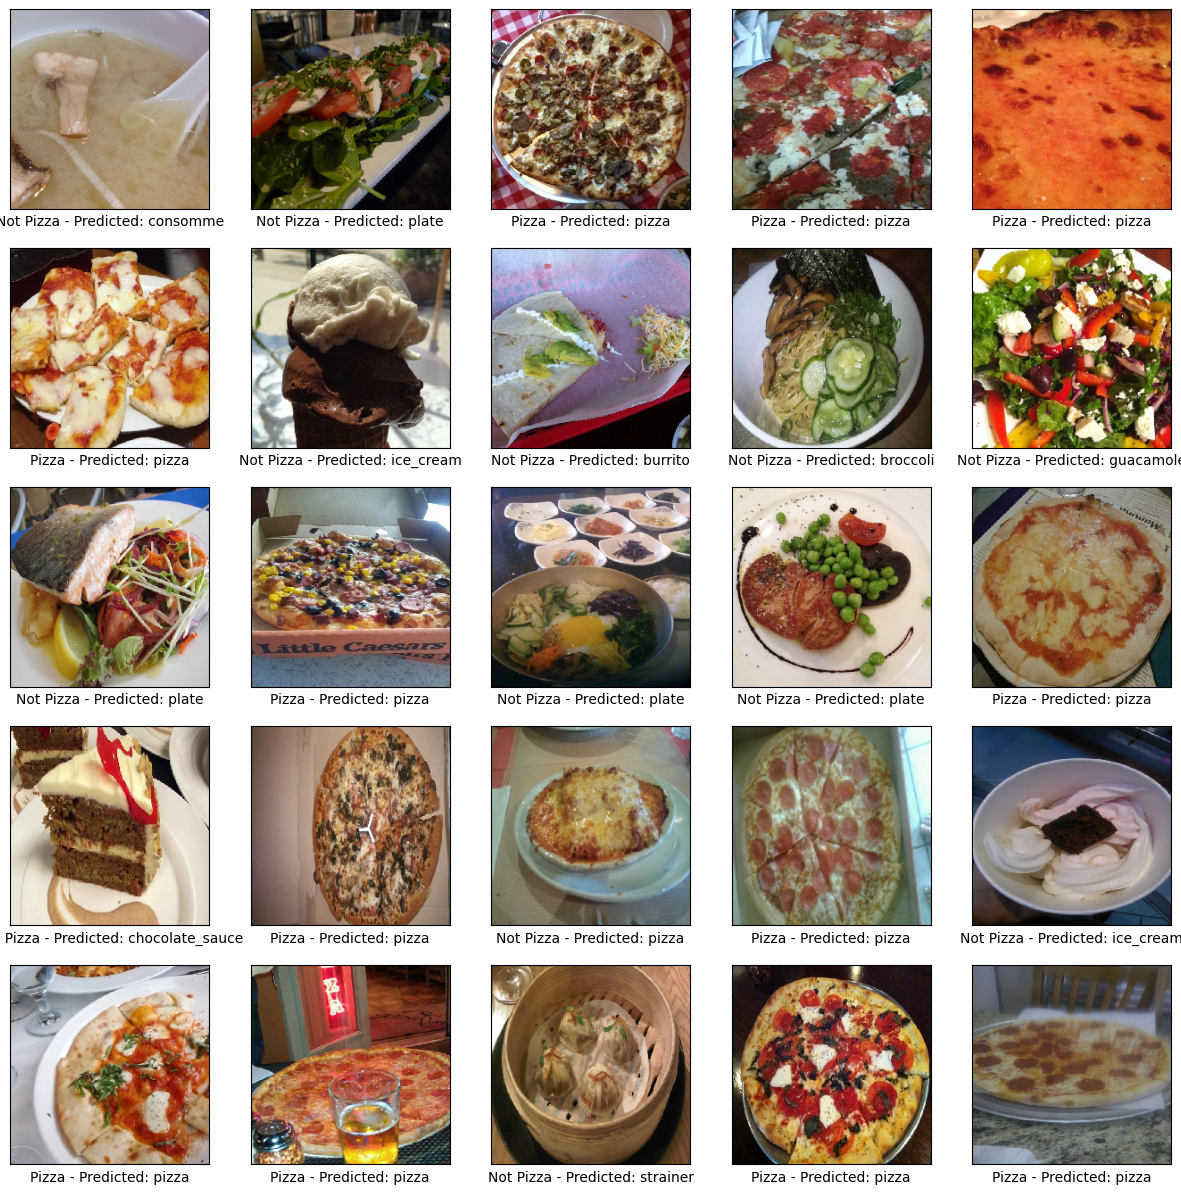

1/1 [==============================] - 0s 131ms/step


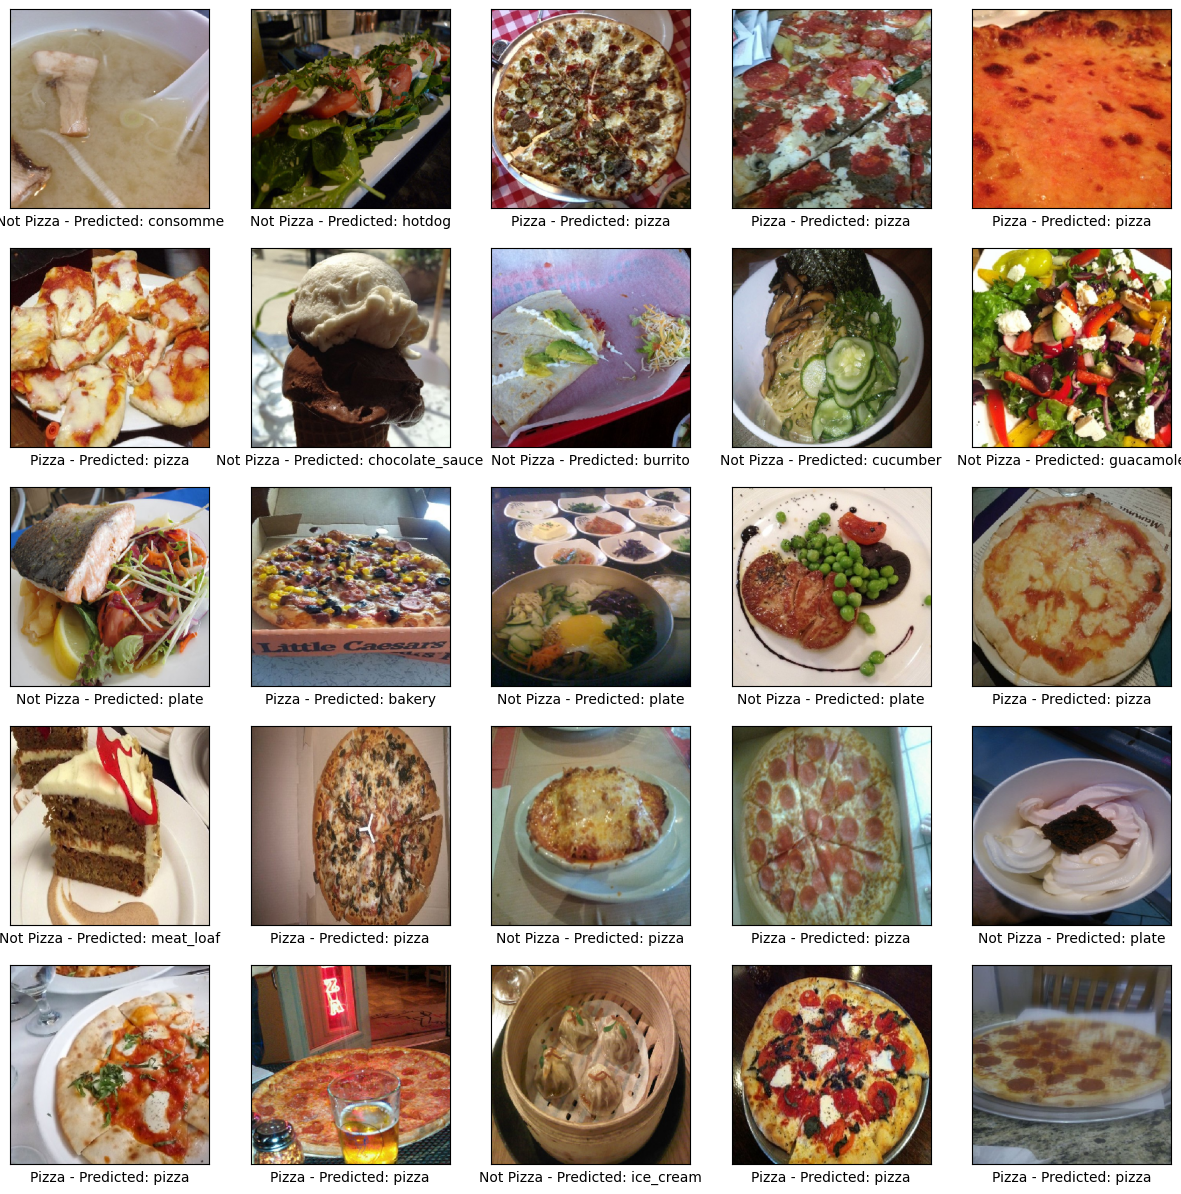

Confusion Matrix for ResNet50: [[13  0]
 [ 2 10]]
Confusion Matrix for VGG16: [[12  1]
 [ 0 12]]
Confusion Matrix for InceptionV3: [[12  1]
 [ 1 11]]


In [1]:
#code adapted from https://keras.io/api/applications/

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_input_resnet, decode_predictions
from keras.applications.vgg16 import VGG16, preprocess_input as preprocess_input_vgg
from keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inception
from sklearn.metrics import confusion_matrix

def select_images(pizza_path, not_pizza_path, num_images):
    pizza_images = [(os.path.join(pizza_path, img), 'Pizza') for img in os.listdir(pizza_path)]
    not_pizza_images = [(os.path.join(not_pizza_path, img), 'Not Pizza') for img in os.listdir(not_pizza_path)]
    all_images = pizza_images + not_pizza_images
    return random.sample(all_images, min(num_images, len(all_images)))

def get_true_labels(selected_images):
    return [1 if label == 'Pizza' else 0 for _, label in selected_images]

def classify_images(selected_images, model, model_name='ResNet50'):
    plt.figure(figsize=(15,15))
    predicted_labels = []
    input_size = (299, 299) if model_name == 'InceptionV3' else (224, 224)

    for i, (img_path, label) in enumerate(selected_images):
        img = image.load_img(img_path, target_size=input_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        if model_name == 'InceptionV3':
            x = preprocess_input_inception(x)
        elif model_name == 'VGG16':
            x = preprocess_input_vgg(x)
        else:
            x = preprocess_input_resnet(x)

        preds = model.predict(x)
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        plt.xlabel(f'{label} - Predicted: {decode_predictions(preds, top=1)[0][0][1]}')

        predicted_class = decode_predictions(preds, top=1)[0][0][1]
        predicted_labels.append(1 if 'pizza' in predicted_class.lower() else 0)

    plt.show()
    return predicted_labels

# Output
selected_images = select_images('pizza_not_pizza/pizza', 'pizza_not_pizza/not_pizza', 25)
true_labels = get_true_labels(selected_images)

# Load models
model_resnet = ResNet50(weights='imagenet')
model_vgg = VGG16(weights='imagenet')
model_inception = InceptionV3(weights='imagenet')

# Classify images and generate confusion matrices
predicted_labels_resnet = classify_images(selected_images, model_resnet)
conf_matrix_resnet = confusion_matrix(true_labels, predicted_labels_resnet)

predicted_labels_vgg = classify_images(selected_images, model_vgg, 'VGG16')
conf_matrix_vgg = confusion_matrix(true_labels, predicted_labels_vgg)


predicted_labels_inception = classify_images(selected_images, model_inception, 'InceptionV3')
conf_matrix_inception = confusion_matrix(true_labels, predicted_labels_inception)

print("Confusion Matrix for ResNet50:", conf_matrix_resnet)
print("Confusion Matrix for VGG16:", conf_matrix_vgg)
print("Confusion Matrix for InceptionV3:", conf_matrix_inception)
